# 3. Visualization of Amino Acid Composition Profile

In [70]:
import pandas as pd
import numpy as np

# Load the CSV file
file_path = "combined_fasta_data.csv"
pre_df = pd.read_csv(file_path)

# Calculate protein length and add it to a new column in the data frame
pre_df['Protein_Length'] = pre_df['Sequence'].apply(len)

# Filter protein length from 50 to 200
df = pre_df[(pre_df['Protein_Length'] >= 50) & (pre_df['Protein_Length'] <= 200)]

# testing
df.head()

,Header,Sequence,Species,Protein_Length
0,NP_001018029.1 Coq21p [Saccharomyces cerevisia...,MRNELYQLWCVASAARGVAKSSFVRANSAMCEYVRTSNVLSRWTRD...,Saccharomyces-cerevisiae,66
2,NP_001018031.2 Adf1p [Saccharomyces cerevisiae...,MGKCSMKKKGVGKNVGVGKKVQKKRSISTAERKRTKLQVEKLNKSS...,Saccharomyces-cerevisiae,113
3,NP_001018032.1 uncharacterized protein YCR095W...,MTVLIKLGLRILHVYKGFFRKVILKYFFFSSEHTKVNKKSSMHAFL...,Saccharomyces-cerevisiae,52
4,NP_001018033.3 uncharacterized protein YGR161W...,MSGYFNHLSSNAHFANIQADQGFIGDATGTSSDHGSSGMVDFALQL...,Saccharomyces-cerevisiae,92
5,NP_001027023.1 Nag1p [Saccharomyces cerevisiae...,MNSAGRVHRSRAGSRGHAAISPLTMASFSVARGIRSSNVYDDTDDE...,Saccharomyces-cerevisiae,163


In [71]:
import pandas as pd

# Create a list of all 20 standard amino acids
amino_acids = list("ACDEFGHIKLMNPQRSTVWY")

# Function to calculate amino acid percentages
def calculate_aa_percentage(sequence):
    length = len(sequence)
    aa_counts = {aa: sequence.count(aa) / length * 100 for aa in amino_acids}
    return aa_counts

# Apply the function to the 'Sequence' column and create a new DataFrame
aa_percentage_df = df['Sequence'].apply(calculate_aa_percentage).apply(pd.Series)

aa_perc_seq_df = pd.concat([df[['Sequence', 'Species', 'Protein_Length']], aa_percentage_df], axis=1)

aa_perc_seq_df.to_csv("amino_acid_percentage_data.csv", index=False)

aa_perc_seq_df.head()



,Sequence,Species,Protein_Length,A,C,D,E,F,G,H,...,M,N,P,Q,R,S,T,V,W,Y
0,MRNELYQLWCVASAARGVAKSSFVRANSAMCEYVRTSNVLSRWTRD...,Saccharomyces-cerevisiae,66,16.666667,3.030303,1.515152,6.060606,1.515152,1.515152,0.000000,...,3.030303,6.060606,0.000000,4.545455,12.121212,10.606061,3.030303,9.090909,4.545455,4.545455
2,MGKCSMKKKGVGKNVGVGKKVQKKRSISTAERKRTKLQVEKLNKSS...,Saccharomyces-cerevisiae,113,4.424779,0.884956,2.654867,10.619469,0.884956,5.309735,0.000000,...,4.424779,2.654867,1.769912,5.309735,5.309735,9.734513,7.964602,5.309735,0.000000,0.000000
3,MTVLIKLGLRILHVYKGFFRKVILKYFFFSSEHTKVNKKSSMHAFL...,Saccharomyces-cerevisiae,52,1.923077,1.923077,0.000000,1.923077,11.538462,3.846154,5.769231,...,3.846154,1.923077,0.000000,0.000000,5.769231,7.692308,3.846154,7.692308,0.000000,5.769231
4,MSGYFNHLSSNAHFANIQADQGFIGDATGTSSDHGSSGMVDFALQL...,Saccharomyces-cerevisiae,92,7.608696,1.086957,5.434783,5.434783,6.521739,8.695652,3.260870,...,3.260870,5.434783,2.173913,7.608696,2.173913,13.043478,6.521739,1.086957,1.086957,1.086957
5,MNSAGRVHRSRAGSRGHAAISPLTMASFSVARGIRSSNVYDDTDDE...,Saccharomyces-cerevisiae,163,7.975460,3.680982,3.067485,1.840491,6.134969,4.907975,1.226994,...,3.067485,3.680982,5.521472,1.226994,7.975460,17.177914,7.361963,4.907975,0.000000,1.226994


In [82]:
def calculate_avg_aa_percentage_by_length(df):
    # Group by Protein_Length and calculate the mean for each amino acid column
    grouped_df = df.groupby('Protein_Length').mean(numeric_only=True)
    return grouped_df

aa_perc_seq_df_groupedbylength = calculate_avg_aa_percentage_by_length(aa_perc_seq_df)

aa_perc_seq_df_groupedbylength.head(10)

aa_profile = aa_perc_seq_df_groupedbylength.reset_index()

aa_profile.head()

,Protein_Length,A,C,D,E,F,G,H,I,K,...,M,N,P,Q,R,S,T,V,W,Y
0,50,5.333333,2.000000,4.358974,6.205128,5.589744,5.435897,2.974359,5.333333,4.974359,...,4.153846,3.333333,4.410256,3.743590,6.410256,8.820513,4.666667,6.564103,2.256410,3.435897
1,51,5.744754,3.302374,2.923977,3.233574,3.852769,6.467148,2.958376,5.366357,8.187135,...,4.368765,2.992776,4.884761,4.162367,10.698314,5.882353,4.609563,4.953560,1.995184,4.299966
2,52,5.199430,5.733618,1.816239,3.917379,4.558405,9.259259,1.958689,5.626781,6.623932,...,3.668091,3.418803,3.988604,3.383191,6.196581,7.834758,4.878917,5.413105,1.388889,5.626781
3,53,6.305859,2.581927,3.674280,4.468719,5.561072,6.007944,2.830189,5.561072,6.951341,...,4.419067,3.475670,4.518371,2.730884,6.554121,8.987090,4.766634,5.213505,1.042701,3.128103
4,54,9.090909,3.249158,3.249158,4.545455,4.006734,8.316498,2.340067,3.905724,5.151515,...,3.922559,2.727273,5.000000,4.006734,7.861953,7.693603,4.713805,5.909091,1.649832,3.063973


In [83]:
# change the wide data frame into a "tidy", long data frame as seaborn prefers this type of data frame

aa_profile_melted = aa_profile.melt(
    id_vars=['Protein_Length'], 
    var_name='Amino_Acid', 
    value_name='Percentage')

aa_profile_melted.to_csv("amino_acid_profile.csv", index=False)
aa_profile_melted.head()

,Protein_Length,Amino_Acid,Percentage
0,50,A,5.333333
1,51,A,5.744754
2,52,A,5.199430
3,53,A,6.305859
4,54,A,9.090909


# 3.1　Scatter plot

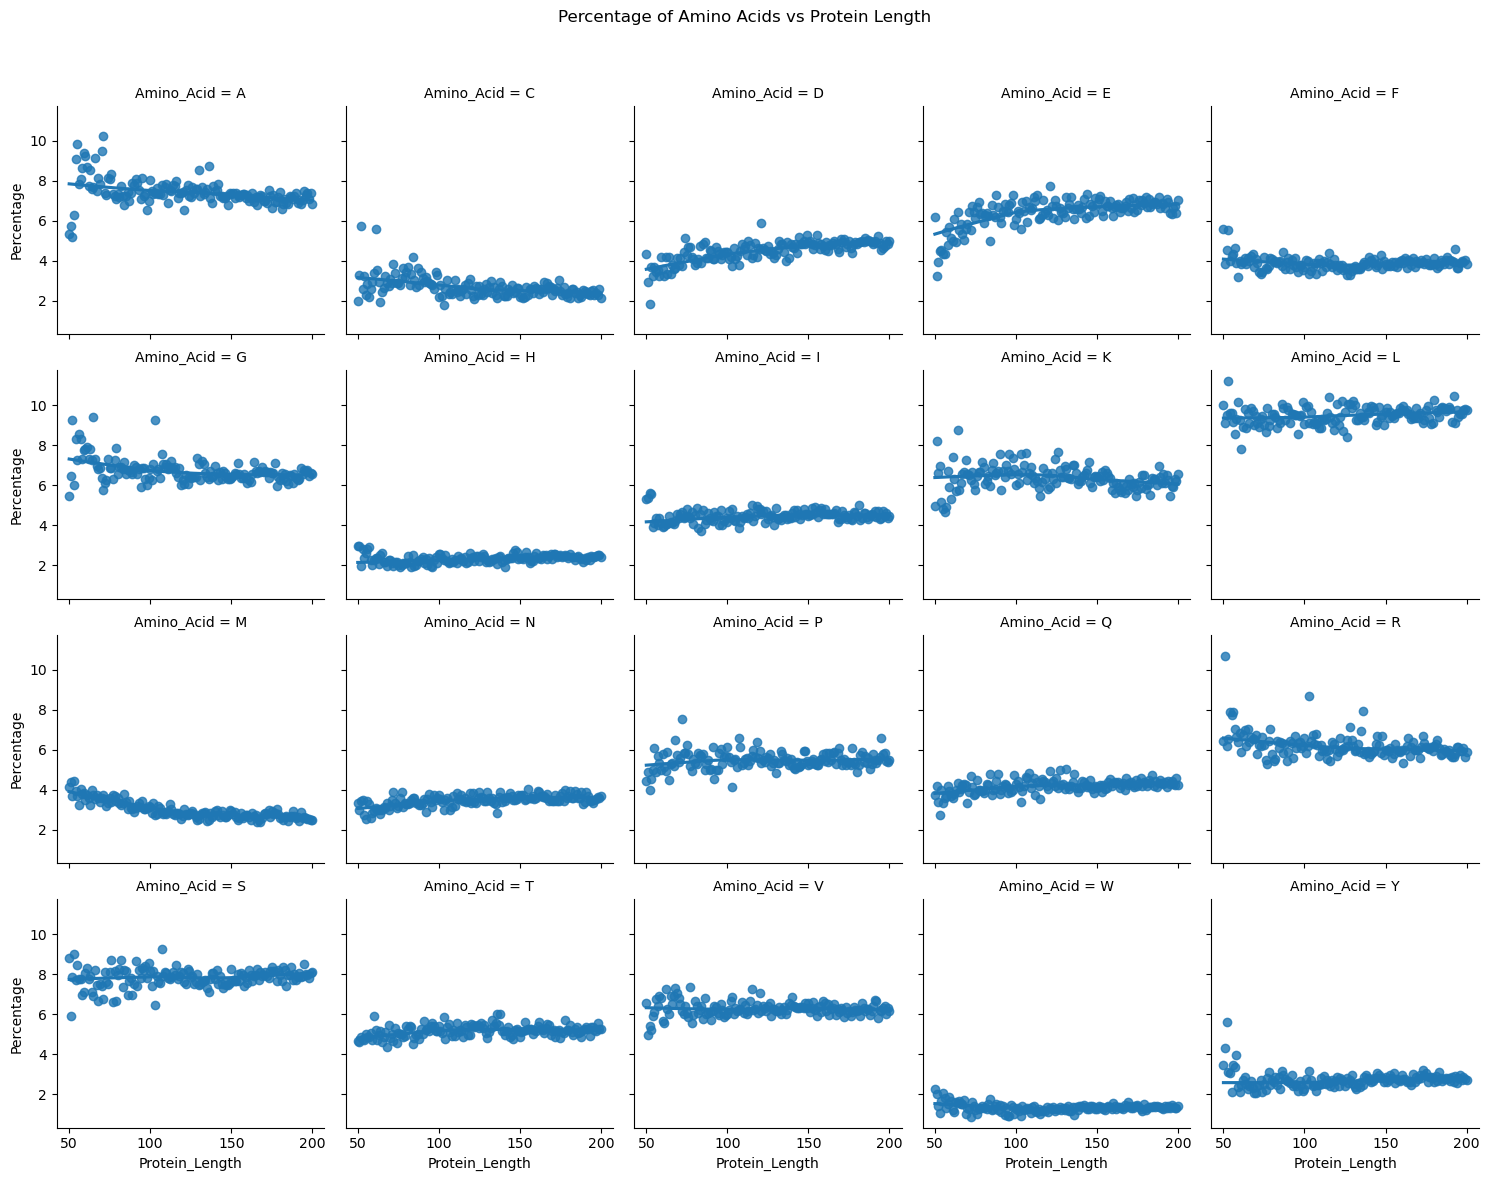

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the lmplot
g = sns.lmplot(
    data=aa_profile_melted,
    x='Protein_Length',
    y='Percentage',
    col='Amino_Acid',
    col_wrap=5,
    lowess=True,
    fit_reg=True,
    height=3,  # Size of each facet
    aspect=1  # Aspect ratio
)

# Adjust the layout for better spacing
plt.subplots_adjust(top=0.9)
g.figure.suptitle('Percentage of Amino Acids vs Protein Length')

plt.show()

# 3.2 Heat maps

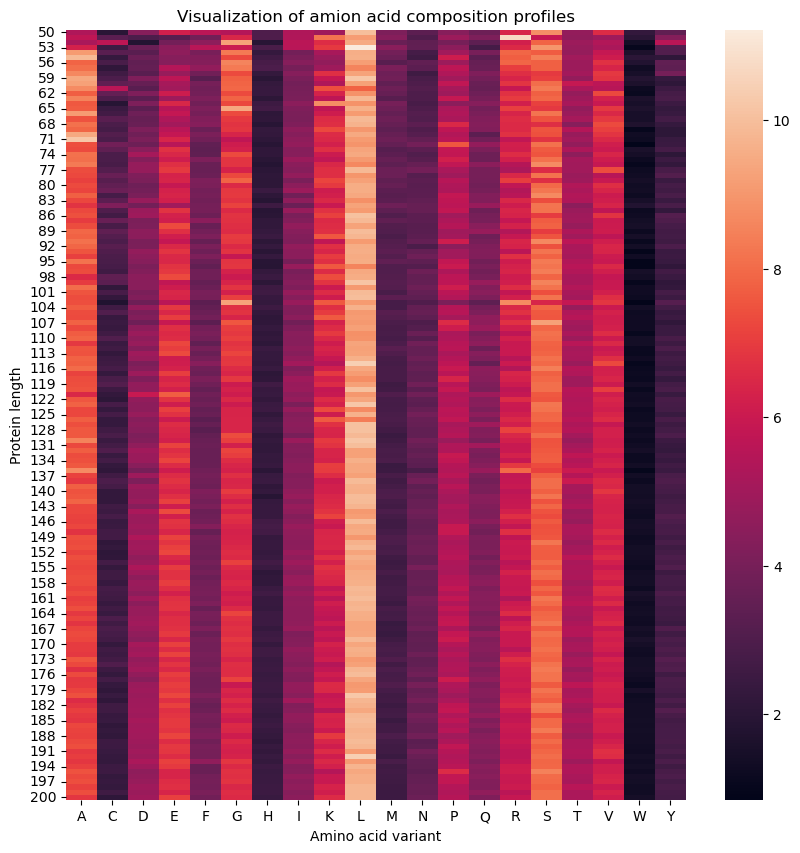

In [101]:
aa_profile_forheatmap = aa_profile

# aa_profile_forheatmap.set_index('Protein_Length', inplace=True)

plt.figure(figsize=(10,10))

sns.heatmap(data=aa_profile_forheatmap)

plt.title("Visualization of amion acid composition profiles")
plt.ylabel("Protein length")
plt.xlabel("Amino acid variant")
plt.show()